<div style="text-align: center">

### SCC0282 - Recuperação de Informação

</div>
<div style="text-align: center">
<br>
<br>

# Trabalho Prático

<br>
<br>
</div>
<div style="text-align: center">

### Instituto de Ciências Matemáticas e de Computação – Universidade de São Paulo (USP)

</div>
<div style="text-align: center">

### São Carlos – SP – Brasil

</div>
<div style="text-align: center">
<br>

Marcius Leandro Jr. 7277433 marcius@usp.br

</div>
<br>
<br>
<div style="text-align: justify">

**Abstract.** The general objective of the project is to develop a textual retrieval system using different indexing mechanisms presented in class. In addition, the project consists of comparing the different strategies developed through evaluation metrics also presented in class.

</div>
<br>
<div style="text-align: justify">

**Resumo.** O objetivo geral do projeto é desenvolver um sistema de recuperação textual utilizando diferentes mecanismos de indexação apresentados em aula. Além disso, o projeto consiste em comparar as diferentes estratégias desenvolvidas por meio de métricas de avaliação também apresentadas na aula.

</div>

----

<br>
<div style="text-align: justify">

## 1. Técnicas Utilizadas

Nesta primeira parte é estabelecido todos metódos e funções para realizar os testes no tópico **2. Execução**
</div>
<br>
<div style="text-align: justify">

### 1.1. Imports e definções de metódos

* Imports das bibliotecas necessárias;
* O método `remove_special_characters` metódo para remoção de caracteres especiais;
* Definção das classes para criar a lista ligada com as frequências das palavras nos documentos;
* Funções de operações lógicas utilizadas posteriormente nas expansões dos métodos.
</div>
<br>

In [ ]:
import glob
import re
import os
import math
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plot

In [ ]:
def remove_special_characters(text):
    regex = re.compile('[^a-zA-Z0-9\s]')
    text_returned = re.sub(regex, '', text)
    return text_returned

In [ ]:
def finding_all_unique_words_and_freq(dict_global, words):
    for word in set(words):
        if word in dict_global.keys():
            dict_global[word] += words.count(word)
        else:
            dict_global[word] = words.count(word)

In [ ]:
class Node:
    def __init__(self, docId, freq):
        self.freq = freq
        self.doc = docId
        self.next = None
    
    def __str__(self):        
        return 'doc:' + str(self.doc) + ', freq:' + str(self.freq)

class LinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        self.n_docs = 0
    
    def print_list(self):
        aux = self.head
        while aux:
            print(aux)
            aux = aux.next
    
    def get_doclist(self):
        l = []
        aux = self.head
        while aux:
            l.append([aux.doc, aux.freq])
            aux = aux.next
        return l
    
    def add_doc(self, doc, freq):
        node = Node(doc, freq)        
        if self.head == None:
            self.head = node        
        else:
            self.tail.next = node
        self.tail = node
        self.n_docs += 1


In [ ]:
def and_operator(p, q):
    answer = []
    i = 0
    j = 0
    while i < len(p) and j < len(q):
        if p[i] == q[j]:
            answer.append(p[i])
            i += 1
            j += 1
        else:
            if p[i] < q[j]:
                i += 1
            else:
                j += 1
    return answer

def or_operator(p, q):
    answer = []
    i = 0
    j = 0
    while i < len(p) and j < len(q):
        if p[i] < q[j]:
            answer.append(p[i])
            i += 1
        elif p[i] > q[j]:
            answer.append(q[j])
            j += 1
        else:
            answer.append(p[i])
            i += 1
            j += 1
    while i < len(p):
        answer.append(p[i])
        i += 1
    while j < len(q):
        answer.append(q[j])
        j += 1
        
    return answer

def not_operator(p):
    answer = []
    i = 0
    for doc in sorted(words_in_doc.keys()):
        if i < len(p) and p[i] == doc:
            i += 1
        else:
            answer.append(doc)
    return answer

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

----
<br>
<div style="text-align: justify">

### 1.2. Leitura da base de textos

Na função `read_all_data` são lidos todos os arquivos da pasta `/TELEGRAPH_UTF8/2007_utf8`, os arquivos foram copiado manualmente das pasta individuais para a raiz da pasta data. Além disso foi feito um tramento na leitura com `try/except` por conta de um arquivo apresentar erro na leitura. Após fazer a leitura da palavras e devidos tramentos, é feito o mapeamento dos docs.

Posteriormente na função `create_linked_lista_data` é criada a lista ligada com as frenquências das palavras nos documentos. 
</div>
<br>

In [ ]:
def read_all_data(N):
    for file in sorted(glob.glob(file_folder)):
        #pegar somente o dentro da TAG
        try:
            tree = ET.parse(file)
            root = tree.getroot()
            text = root[1].text
        except:
            print("Arquivo com erro: "+file)

        #tratamento para pegar as palavras
        text = remove_special_characters(text)
        words = word_tokenize(text)
        words = [word.lower() for word in words]

        #criando dicionario de palavras com as frequencias
        finding_all_unique_words_and_freq(dict_global, words)

        #salvando a indexassão das palavras, mapa e contagem
        idx = os.path.basename(file)    
        docs_mapping.append(idx)
        words_in_doc[idx] = words
        N += 1
    return N

In [ ]:
def create_linked_lista_data(linked_list_data):
    for word in unique_words_all:
        linked_list_data[word] = LinkedList()

    for docID in docs_mapping:
        words = words_in_doc[docID]
        for word in set(words):
            linked_list_data[word].add_doc(docID, words.count(word))
    
    return linked_list_data

In [ ]:
def get_docs_relevant(filename):
    file=open(filename,'r')
    lines=file.readlines()
    docs = {}

    for line in lines:
        data=line.split(" ")
        if data[3] == '1\n':
            idx = os.path.basename(data[2])
            if docs.get(data[0]):
                docs[data[0]].append(idx)
            else:
                docs[data[0]] = [idx]
                
    
    file.close()
    return docs

In [ ]:
def get_docs(filename):
    file=open(filename,'r')
    lines=file.readlines()
    docs = {}

    for line in lines:
        data=line.split(" ")
        idx = os.path.basename(data[2])
        if docs.get(data[0]):
            docs[data[0]].append(idx)
        else:
            docs[data[0]] = [idx]
                
    
    file.close()
    return docs

----
<br>
<div style="text-align: justify">

### 1.3. Modelo Boleano

O modelo boleano foi construído para ter como base a expansão das consultas e ter como base quais os documentos retornados. Assim ficou mais facíl ter o comparativo para os demais modelos.
</div>
<br>

In [ ]:
def boolean_model(query):
    query = remove_special_characters(query)
    query = word_tokenize(query.lower())
    query = intersection(query, sorted(set(linked_list_data.keys())))

    if len(query)>1 and query[0] == 'not':
        answer = not_operator(linked_list_data[query[1]].get_doclist())
    elif len(query)>0:
        answer = linked_list_data[query[0]].get_doclist()
    for i in range(len(query)):
        if len(query)>i+1 and query[i] == 'and':
            if  len(query)>i+2 and  query[i+1] == 'not':
                t2 = not_operator(linked_list_data[query[i+2]].get_doclist())
            elif len(query)>i:
                t2 = linked_list_data[query[i+1]].get_doclist()
            answer = and_operator(answer, t2)
        if len(query)>i+1 and query[i] == 'or':
            if len(query)>i+2 and  query[i+1] == 'not':
                t2 = not_operator(linked_list_data[query[i+2]].get_doclist())
            elif len(query)>i:
                t2 = linked_list_data[query[i+1]].get_doclist()
            answer = or_operator(answer, t2)

    answer = sorted(answer, key=lambda item: item[1], reverse=True)
    return answer

----
<br>
<div style="text-align: justify">

### 1.4. Modelo Probabilístico

No modelo probalístico foi quebrado em duas funções uma normal e outra considereando os arquivos listados como relevantes no documento `en.qrels.76-125.2010.txt` assim é possível ter a comparação com uma base já determinada.

Os métodos ficaram demorados por conta da quantidade de `if` para fazer as considerações e não estourar o tamanho do vetor.
</div>
<br>

In [ ]:
def probabilistic_model(query):
    query = remove_special_characters(query)
    query = word_tokenize(query.lower())
    query = intersection(query, sorted(set(linked_list_data.keys())))

    answer = {}
    for doc in words_in_doc.keys():
        words = words_in_doc[doc]
        common_words = intersection(query, words)
        score = 0
        for ki in common_words:
            score += math.log10((N+0.5)/(linked_list_data[ki].n_docs+0.5))
        answer[doc] = score

    answer = sorted(answer.items(), key=lambda item: item[1], reverse=True)
    return answer

def probabilistic_model_relevant(key, query, docs):
    query = word_tokenize(query.lower())
    query = intersection(query, sorted(set(linked_list_data.keys())))
    relevant_docs = docs[key]
    n_rel_docs = {}
    for q in query:
        postings = linked_list_data[q].head
        n_rel_docs[q] = 0
        while postings:
            if postings.doc in relevant_docs: # TODO: optimize to O(n)
                n_rel_docs[q] += 1
            postings = postings.next
    answer = {}
    for doc in words_in_doc.keys():
        words = words_in_doc[doc]
        common_words = intersection(query, words)
        score = 0
        for ki in common_words:
            ni = linked_list_data[ki].n_docs
            R = len(relevant_docs)
            ri = n_rel_docs[ki]
            if ni > N/2:
                numerator = ((ri+0.5)*(N/2-R+ri+0.5))
                denominator = ((R-ri+0.5)*(ni/2-ri+0.5))
            else:
                numerator = ((ri+0.5)*(N-ni-R+ri+0.5))
                denominator = ((R-ri+0.5)*(ni-ri+0.5))
            div = numerator/denominator
            score += math.log10(div)
        answer[doc] = score
    
    answer = sorted(answer.items(), key=lambda item: item[1], reverse=True)
    return answer

----
<br>
<div style="text-align: justify">

### 1.5. Modelo Vetorial

No modelo vetorial foram feitas as mesmas considerações porém não foi realizado a expansão das consultas.
</div>
<br>

In [ ]:
def matrix_words():
    for i in range(len(unique_words_all)):
        word = unique_words_all[i]
        postings = linked_list_data[word].get_doclist()
        ni = linked_list_data[word].n_docs
        idf = math.log2(N/ni)
        for node in postings:
            docID = node[0]
            freq = node[1]
            pos = docs_mapping.index(docID)
            m[i, pos] = (1 + math.log2(freq))*idf

    norm = np.sum(m**2, axis=0)
    norm = [math.sqrt(norm[i]) for i in range(len(norm))]

def vector_model(query):
    query = remove_special_characters(query)
    query = word_tokenize(query.lower())
    query = intersection(query, sorted(set(linked_list_data.keys())))
    query = [q.lower() for q in query]
    q_vector = np.zeros(len(unique_words_all))
    answer = {}
    for i in range(len(unique_words_all)):
        word = unique_words_all[i]
        if word in query:
            ni = linked_list_data[word].n_docs
            idf = math.log2(N/ni)
            q_vector[i] = (1 + math.log2(query.count(word)))*idf
    
    ranking = np.zeros(N)
    for j in range(N):
        ranking[j] = np.dot(m[:,j], q_vector) / norm[j]
        answer[j] = [docs_mapping[j], ranking[j]]

    answer = sorted(answer.items(), key=lambda item: item[1], reverse=True)
    return answer

----
<br>
<div style="text-align: justify">

### 1.6. Métodos para fazer a consultas dinamicamentes

Para fazer as consultas em massa foi criado a função `read_all_queries` onde é foi considerado como consulta a oração dentro da `<title></title>`.

As demais funções são para chamar os respectivos modelos para processar cada consulta passa como parâmetro.
</div>
<br>

In [ ]:
def read_all_queries():
    filename = "en.topics.76-125.2010.txt"
    tree = ET.parse(filename)
    root = tree.getroot()
    all_queries = {}

    for child in root:
        id = child[0].text
        text = remove_special_characters(child[1].text)
        all_queries[id] = text
    
    return all_queries

In [ ]:
def boolean_model_all(all_queries):
    answer = {}
    for key, query in all_queries.items():
        answer[key] = boolean_model(query)
    return answer

def probabilistic_model_all(all_queries):
    answer = {}
    for key, query in all_queries.items():
        answer[key] = probabilistic_model(query)
    return answer

def probabilistic_model_relevant_all(all_queries, relevant_docs):
    answer = {}
    for key, query in all_queries.items():
        answer[key] = probabilistic_model_relevant(key, query, relevant_docs)
    return answer

def vector_model_all(all_queries):
    answer = {}
    for query in all_queries:
        answer[key] = vector_model(query)
    return answer

----

<br>
<div style="text-align: justify">

## 2. Execução

Neste capítulo é realizado os teste para obter as métricas de comparação dos modelos abordados.

* Leitura da base de dados;
* Criação da lista ligada;
* Leitura das consultas;
* Chamada do modelo boleano;
* Chamada do modelo probabilístico;
* Chamada do modelo probabilístico pré lista de arquivos relevantes;
* Chamada do modelo vetorial: `dtype='float16'` foi adicionado a notação para não estourar a memória pois estava alocando uma matriz de 32G.
</div>
<br>

In [ ]:
file_folder = 'data/*'
dict_global = {}
words_in_doc = {}
docs_mapping = []
N = read_all_data(0)

In [ ]:
unique_words_all = sorted(set(dict_global.keys()))

linked_list_data = create_linked_lista_data({})

In [ ]:
all_queries = read_all_queries()

In [ ]:
relevant_docs = get_docs_relevant("en.qrels.76-125.2010.txt")

In [ ]:
answer_boolean = boolean_model_all(all_queries)

In [ ]:
answer_probabilistic = probabilistic_model_all(all_queries)

In [ ]:
answer_probabilistic_relevant = probabilistic_model_relevant_all(all_queries, relevant_docs)

In [ ]:
m = np.zeros((len(unique_words_all), len(docs_mapping)), dtype='float16')
norm = matrix_words()

In [ ]:
answer_vector = vector_model_all(all_queries)

----

<br>
<div style="text-align: justify">

## 3. Avaliação

Foi utilizado as métricas de Precisão e Revocação, para obter a dimensão dos documentos foi usado a lista pré definida, assim foi possivel resgatar pelas consulta a lista de respostas, e então se aplicar a formulas para calculo de cada métrica. 

* Revocação = |Relevantes intersecção Resposta| / Relevantes
* Precisão = |Relevantes intersecção Resposta| / Resposta
</div>
<br>

In [134]:
def revocation_precision(answer, relevant, doc):
    x = []
    y = []
    cont = 0
    for key, U in doc.items():
        try:
            i = len(U)
            A = answer[key][:i+1]
            A = [a[0] for a in A]
            R = relevant[key]
            inte = intersection(A, R)
            x.append(len(inte)*100/len(R))
            y.append(len(inte)*100/len(A))
        except:
            x.append(0)
            y.append(0)

    plot.hist(x, bins='auto')
    plot.title("Recall")
    plot.show()

    plot.hist(y, bins='auto')
    plot.title("Precision")
    plot.show()



In [ ]:
docs = get_docs("en.qrels.76-125.2010.txt")

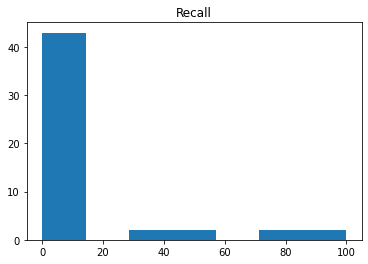

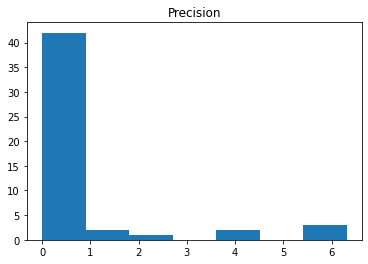

In [135]:
revocation_precision(answer_boolean, relevant_docs, docs)

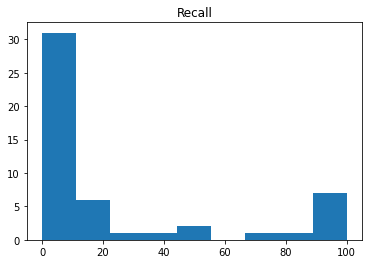

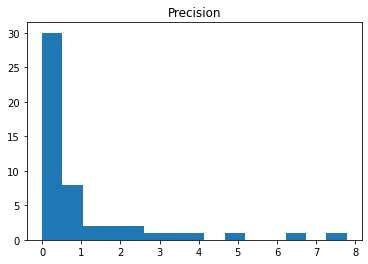

In [136]:
revocation_precision(answer_probabilistic, relevant_docs, docs)

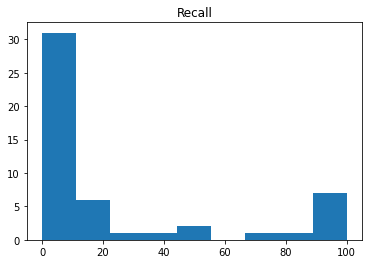

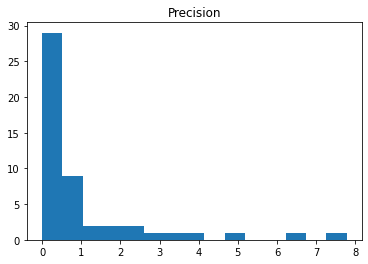

In [137]:
revocation_precision(answer_probabilistic_relevant, relevant_docs, docs)

In [ ]:
revocation_precision(answer_vector, relevant_docs, docs)

----

<br>
<div style="text-align: justify">

## 4. Resultados Obtidos

Podemos observar nos graficos acima, que para algumas consultas, a precisão e revocação chegaram a 100% quando observado os dados dessas consultas, se percebe uma precisão da query com algum trecho de oração dos documentos, dessa forma trazendo os documentos mais fies.

Porém é possivel observar a concentração dos dados no histograma proximo ao valor de 8% a 20%, isso mostrando que para a maioria das consultas, é dificil se obter um documento relvante.

</div>
<br>

In [ ]:
----

<br>
<div style="text-align: justify">

## 3. Resultados Obtidos

Foi utilizado as métricas de Precisão e Revocação, para obter a dimensão dos documentos foi usado a lista pré definida, assim foi possivel resgatar pelas consulta a lista de respostas, e então se aplicar a formulas para calculo de cada métrica. 

* Revocação = |Relevantes intersecção Resposta| / Relevantes
* Precisão = |Relevantes intersecção Resposta| / Resposta
</div>
<br>

----

<br>
<div style="text-align: justify">

## 5. Considerações finais

Com a concluisão a implementação das avaliações e resultado, considero o aprendizado, completo compreendendo funcionamento dos métodos, e estabelecer a relação entre complexidade e assertividade. 

Uma vez que quanto mais preciso é a ordenação e distribuição do posicionamento dos arquivos mais complexo se torna o algoritmo aumentando o tempo de processamento.

Também é possivel observar que o modelo vectorial, mesmo consumindo um poder de processamento maior, quanto maior for o conjunto de dados, ele não ira aumentar tanto o tempo de comparação, o que também facilita a inserção de novos documentos na base.

Porém os modelos probabilisticos para uma base em especifico dando uma resposta satisfatória, em torno de 20%. em um tempo consideravel curto quando comparado com o método vetorial.

Já o modelo boleano tem uma resposta bem diferente, pois tem a revocção alta e a precisão mais baixa.
</div>
<br>